# neural network building and training

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
#feed forward neural network. with two hidden layer.


In [4]:
class model(nn.Module):
    #input layer(4features of the flower)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))#rectified linear unit
        x = F.relu(self.fc2(x))   
        x = self.out(x)

        return x
    
torch.manual_seed(32) #picking a manual seed for randomizaation
# if loss eval is bad bw test and train, we reduce the seed no. it worked

mod = model()



In [5]:
#print(model)
csv_path = r"C:\Programming\Projects\Learn\pytorch\archive\Iris.csv"
df = pd.read_csv(csv_path)

df['Species'] = df['Species'].replace('Iris-setosa', 0)
df['Species'] = df['Species'].replace('Iris-versicolor', 1)
df['Species'] = df['Species'].replace('Iris-virginica', 2)

#print(df.head)



C:\Users\jai19\AppData\Local\Temp\ipykernel_18704\2293203200.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace('Iris-virginica', 2)


In [6]:
# train test and split now
X=df.drop(['Id','Species'], axis=1)
y=df['Species']

X = X.values
y = y.values

#print(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=32)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)#y and x labels to tensors.
y_test = torch.LongTensor(y_test)



In [7]:
#criteria to measure the error
criterion = nn.CrossEntropyLoss()
#adam optimizer
optimizer = torch.optim.Adam(mod.parameters(), lr=0.01)

#print(mod.parameters)



In [8]:
#train the model.
epochs=100
losses = []
for i in range(epochs):
    y_pred = mod.forward(X_train) # go forward and predict
    loss =criterion(y_pred, y_train) #predicted vs y_train
    losses.append(loss.detach().numpy())#keeping track 
    if i%10==0:
        print(f'Epoch:{i} and loss: {loss}') #print every ten epochs
    # back propogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



Epoch:0 and loss: 1.169895887374878
Epoch:10 and loss: 0.9578844308853149
Epoch:20 and loss: 0.7988812327384949
Epoch:30 and loss: 0.634953498840332
Epoch:40 and loss: 0.44043004512786865
Epoch:50 and loss: 0.29171696305274963
Epoch:60 and loss: 0.1782904416322708
Epoch:70 and loss: 0.11587586998939514
Epoch:80 and loss: 0.08928148448467255
Epoch:90 and loss: 0.077437624335289


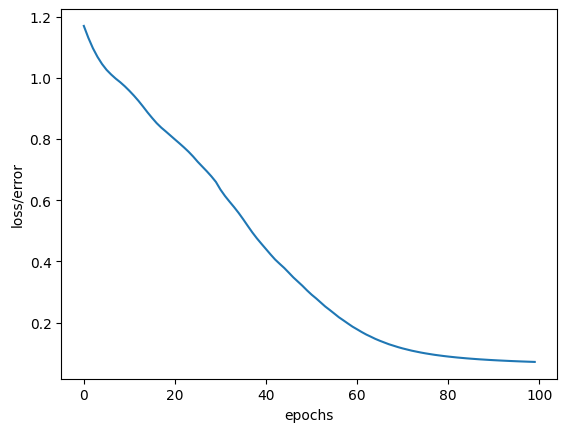

In [9]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")
plt.show()

# ` eval starts here `

In [10]:
# eval of the model on test
with torch.no_grad(): #will turn of back propogation
    y_eval = mod.forward(X_test) #y_eval will be predictions
    loss = criterion(y_eval, y_test) #error findings
    

In [11]:
loss

tensor(0.0539)

In [12]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val= mod.forward(data)

        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} ')

        if y_val.argmax().item()== y_test[i]:
            correct += 1
        
print(f'we got :', {correct})

1.) tensor([-3.3580,  3.9452,  0.3616]) 	 1 	 1 
2.) tensor([  7.5862,   1.1113, -11.3861]) 	 0 	 0 
3.) tensor([  6.6288,   1.5092, -10.4603]) 	 0 	 0 
4.) tensor([-3.3304,  4.2647,  0.0569]) 	 1 	 1 
5.) tensor([-7.3705,  2.8135,  5.1481]) 	 2 	 2 
6.) tensor([-7.3749,  3.9061,  4.2781]) 	 2 	 2 
7.) tensor([  6.2304,   1.6527, -10.0543]) 	 0 	 0 
8.) tensor([  6.8783,   1.4056, -10.7016]) 	 0 	 0 
9.) tensor([-2.6728,  4.3138, -0.6444]) 	 1 	 1 
10.) tensor([  7.2201,   1.3890, -11.1494]) 	 0 	 0 
11.) tensor([-3.8269,  4.4110,  0.5165]) 	 1 	 1 
12.) tensor([-8.6886,  1.9990,  6.9012]) 	 2 	 2 
13.) tensor([-2.0605,  3.8275, -0.7672]) 	 1 	 1 
14.) tensor([-1.0676,  4.3809, -2.2975]) 	 1 	 1 
15.) tensor([-7.5000,  2.6230,  5.3318]) 	 2 	 2 
16.) tensor([-8.6214,  1.5491,  7.1280]) 	 2 	 2 
17.) tensor([-3.7724,  3.6503,  0.9422]) 	 1 	 1 
18.) tensor([-6.7624,  2.7791,  4.5289]) 	 2 	 2 
19.) tensor([-1.6978,  4.2047, -1.4772]) 	 1 	 1 
20.) tensor([  7.8104,   1.3824, -11.9435]) 

done

# feeding new data 


In [13]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [16]:
with torch.no_grad():
    print(mod(new_iris))

tensor([  6.9155,   1.2532, -10.6096])
